# Processamento Digital de Sinais

## Amostragem de sinais de tempo contínuo

### Grupo formado por:
    Danilo Raposo 
    Janderson Barboza
    Rodrigo Cunha


### Os tópicos que são abordados serão os seguintes:

- Fundamentação dos sinais de tempo contínuo
- Fundamentação do processo de amostragem
- Teorema de Nyquist
- Tipos de amostragem
  - Amostragem com Impulsos
  - Amostragem Natural
  - Amostragem _sample and hold_
- Considerações finais
- Referências
  

In [1]:
#Importando as bibliotecas que serão necessárias para realização do processo de exemplificação
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import numpy as np
import scipy.signal as sng
import matplotlib.animation as animation
from IPython.display import Image
from IPython.core.display import HTML 

#Importando os valores que serão utilizados de forma recorrente na apresentação desse trabalho
pi = 2 * np.pi                               #Definição do valor de pi

'''
Uma nota importate, como muitas linhas desse código utilizam variáveis com a mesma nomenclatura, recomenda-se que
seja executado as linhas do código de forma sequêncial, do contrário é bem provável que seja obtido representações
não esperadas que por sua vez são errôneas diante do que foi objetivado.
''';

## Fundamentação dos sinais de tempo contínuo

        Qualquer sinal que é gerado e obtido através da natureza transmite informação que, contendo dados relevantes ou não, pode ser representado a partir de conjuntos matemáticos, definindo características únicas do mesmo, tais como sua amplitude, frequência ou até mesmo a extensão do seu sinal quando representado no tempo. Porém, por se tratar de um sinal que tem como principal aspecto a quantidade infinita de valores em um único instante de tempo observado, o mesmo apresenta uma susceptibilidade tamanha a fatores adtivos que comprometeriam a utilização da informação uma vez transmitida, tomando como exemplo a prórpia voz trafegando de um ponto a outro. Certamente vale mencionar que o ruído não é o único fator que pode acarretar na alteração do sinal transmitido, porém a variável noise será tida como representante de quaisquer alterações no sinal para facilitar a compreensão.

        Uma forma de contornar tal problema é fazendo o processo de digitalização do sinal, que consiste em transformar tanto os níveis de amplitude como o período do sinal, uma vez infinitos, em valores finitos, facilitando a visualização de eventuais erros durante o processo de transmissão da informação e certamente também quanto ao processo de correção da mesma no receptor.

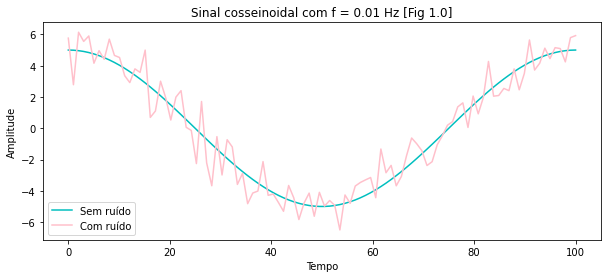

In [2]:
tmin = 0   
tmax = 100
t = np.linspace(tmin, tmax, 100)                  #Gerando a margem gráfica
f = 1/tmax
noise = np.random.normal(0,1,100)                 #Definição do ruído

x = 5*np.cos(pi*t)                                #Representação do sinal sem ruído
xn = (5*np.cos(pi*t)) + noise                     #Representação do ruído mencionado

'plot'
plt.figure(figsize=(10,4))
plt.ylabel('Amplitude')
plt.xlabel('Tempo')
plt.title('Sinal cosseinoidal com f = {} Hz [Fig 1.0]'.format(f))
plt.plot(t, x, 'c', label="Sem ruído")
plt.plot(t, xn, 'pink', label="Com ruído")
plt.legend();

## Fundamentação do processo de amostragem

        O processo de amostragem, por sua vez, é o primeiro passo que deve ser tomado para alcançar o objetivo de tornar o sinal menos susceptível ao ruído inerente ao processo de comunicação, visando, certamente, a digitalização do sinal. 
        É possível visualizar a seguir a notação mais comum diante da representação de um sinal discreto no tempo, sendo ela uma sequência de números x. Sendo o valor no instante x[n] o valor da função x(t) no instante nT, sendo n um número inteiro.

> $ x = { x[n] } = { x(nTs)} , - ∞< n < ∞ \text{ [1.0]}$ 

        Conceituando um pouco melhor o que foi mencionado, digitalização de um sinal possa de fato ser realizado, o sinal primordiamente deverá ser convoluído com um trem de impulsos, e a partir do uso de suas propriedades, será obtido um sinal que tem uma aplitude correspondente as amplitudes do sinal original, porém com um período n discreto.

        Abaixo será apresentado o impulso unitário e também o trem de pulsos (que nada mais é do que a soma sequencial de impulsos unitários deslocados em n)

        Impulso unitário
>$ δ(t) = \left\{
\begin{array}{ll}
      1, &t = 0 \\
      0, &t ≠ 0 \\
\end{array} 
\right. \text{ [2.0]}  $ 

        Área do impulso unitário
>$∫δ(t) = 1 \text{ [2.1]}$ 


        Representação gráfica do impulso unitário deslocado no tempo:

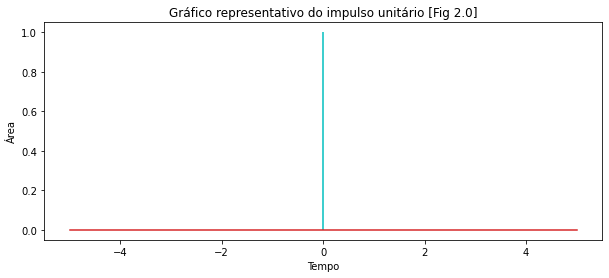

In [3]:
n1 = np.arange(-5,6)                                              #Gerando a margem gráfica
impulse = sng.unit_impulse(11, 'mid')                             #Criando o impulso unitário (inexistente na prática)     

'plot'
plt.figure(figsize=(10,4))
plt.stem(n1, impulse, 'c', markerfmt = ' ',use_line_collection=True)
plt.ylabel('Área')
plt.xlabel('Tempo')
plt.title('Gráfico representativo do impulso unitário [Fig 2.0]');

        Trem de impulsos
>$ x_δ = \sum \limits _{n=-∞}^∞ δ (t - nT)\text{ [3.0]}$

        Representação gráfica do trem de impulsos:

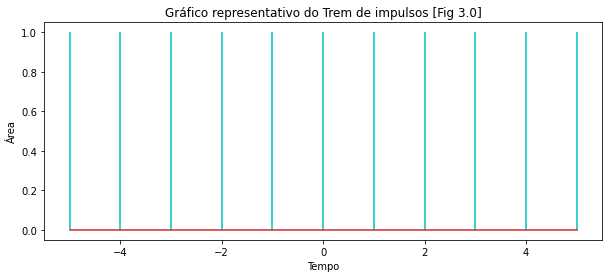

In [4]:
n1 = np.arange(-5,6)                                              #Gerando a margem gráfica
impulse = 0                                                       #Representação do Trem de pulsos
for i in range(11):
    impulse = impulse + sng.unit_impulse(11, i)                      

'plot'
plt.figure(figsize=(10,4))
plt.stem(n1, impulse, 'c', markerfmt = ' ',use_line_collection=True)
plt.ylabel('Área')
plt.xlabel('Tempo')
plt.title('Gráfico representativo do Trem de impulsos [Fig 3.0]');

        Com a visualização do trem de pulsos que será responsável por amostrar o sinal, a fórmula matemática que devemos nos ater frente ao processo de amostragem toma como definição o seguinte:

> $ xs(t) = \sum \limits _{n=-∞}^∞ x(nTs)δ(t - nTs)\text{ [4.0]} $ 

        Para que possa ficar um pouco mais claro a aplicação do trem de impulsos, abaixo será apresentado um exemplo utilizando o sinal que foi visto anteriormente.

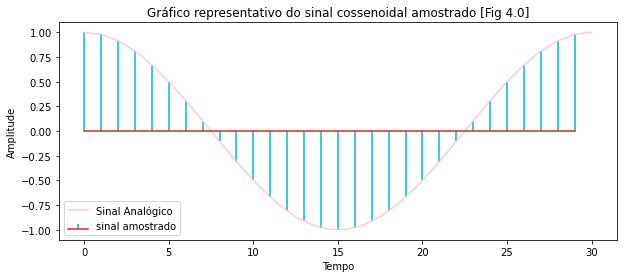

In [5]:
tmin = 0   
tmax = 30
t1 = np.linspace(tmin, tmax, 30) 
n = np.arange(30)                                 #Definição de n pontos discretos

x1 = np.cos(pi*t1)                                #Representação do sinal sem ruído
nt = 1/30                                         #Processo direto de amostragem (sem convolução de forma direta)
xs = np.cos(pi * n * nt) 

'plot'
plt.figure(figsize=(10,4))
plt.ylabel('Amplitude')
plt.xlabel('Tempo')
plt.plot(t1, x1, 'pink', alpha = 0.8, label='Sinal Analógico')
plt.stem(n , xs, 'c', markerfmt=' ', use_line_collection=True, label="sinal amostrado")
plt.title('Gráfico representativo do sinal cossenoidal amostrado [Fig 4.0]')
plt.legend();

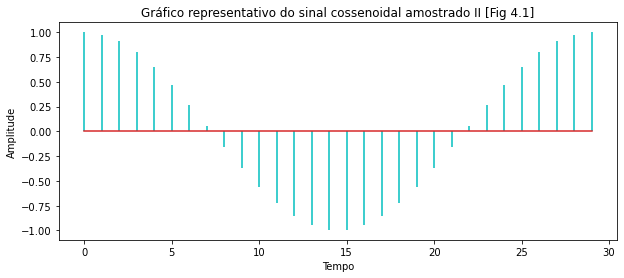

In [6]:
impulse = 0                                            #Representação do Trem de pulsos
for i in range(30):
    impulse = impulse + sng.unit_impulse(30, i)

conv = x1 * impulse                                    #Convolução

'plot'
plt.figure(figsize=(10,4))
plt.ylabel('Amplitude')
plt.xlabel('Tempo')
plt.stem(n, conv, 'c', markerfmt=' ', use_line_collection=True)
plt.title('Gráfico representativo do sinal cossenoidal amostrado II [Fig 4.1]');

        Conforme pode ter sido deduzido a partir da apresentação acima feita, o processo de amostragem varia conforme a quantidade de amostras que é retirada do sinal que precisa pretende-se amostrar, e essa variável está sendo representada pelo Ts na equação 4.0.
        
## Teorema de Nyquist

        A frequência de amostragem (ou período de amostragem, ambos simbolizam a mesma operação) ressalta consigo um tema bastante importante, tema esse titulado como Teorema de amostragem. Tal proposição delimita que um sinal limitado em banda sem componentes espectrais além de FM, pode ser determinado exclusivamente por valores amostrados em intervalos uniformes, sendo tal teorema representado da seguinte forma:

   > $ Ts ≤ 1/fm \text{ [5.0]}$ 

        Caso a frequência de amostragem não seja maior ou igual a frequência do sinal a ser amostrado, serão apresentados ao processo de amostragem uma série de problemas que prejudicarão tanto a visualização do sinal (graficamente falando) como durante o processo de reconstrução do mesmo a partir de um receptor. A amostragem cosiste na multiplicação do sinal pelo impulso unitário, se mudarmos a representação do sinal para o domínio da frequência é possível visualizar o quão agressivamente o sinal é prejudicado quanto não considerado o teorema da amostragem. 

        A seguir, será demonstrado graficamente como que a alteração das frequências de amostragem podem fazer com que o sinal seja drasticamente modificado.

In [7]:
#Definição de variáveis para teste do tópico comentado acima

f1 = 200                                   #Frequência do sinal analógico 

#Sinal a 400 amostras por segundo
fs1 = 400                                   # Frequência de amostragem do sinal (fs)
T1 = 0.03                                   # Duração do período                (t )
t1 = np.arange(fs1*T1)/fs1                  # Gerando a margem gráfica

#Sinal a 900 amostras por segundo
fs2 = 900                                   # Frequência de amostragem do sinal (fs)
T2 = 0.03                                   # Duração do período                (t )
t2 = np.arange(fs2*T2)/fs2                  # Gerando a margem gráfica

#Sinal a 3000 amostras por segundo
fs3 = 3000                                  # Frequência de amostragem do sinal (fs)
T3 = 0.03                                   # Duração do período                (t )
t3 = np.arange(fs3*T3)/fs3                  # Gerando a margem gráfica

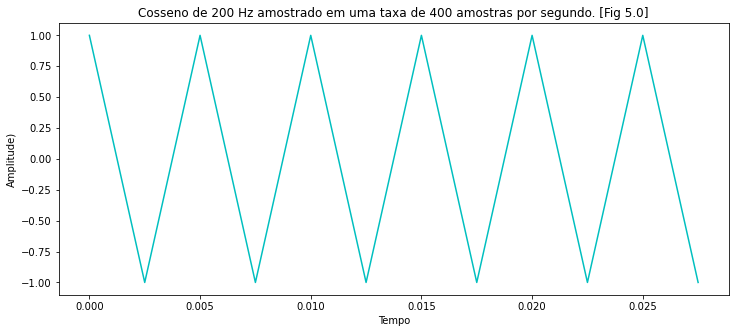

In [8]:
y1 = np.cos(pi*f1*t1)

'plot'
plt.figure(figsize=(12,5))
plt.plot(t1, y1, 'c')
plt.xlabel('Tempo')
plt.ylabel('Amplitude)')
plt.title('Cosseno de {} Hz amostrado em uma taxa de {} amostras por segundo. [Fig 5.0]'.format(f1,fs1));

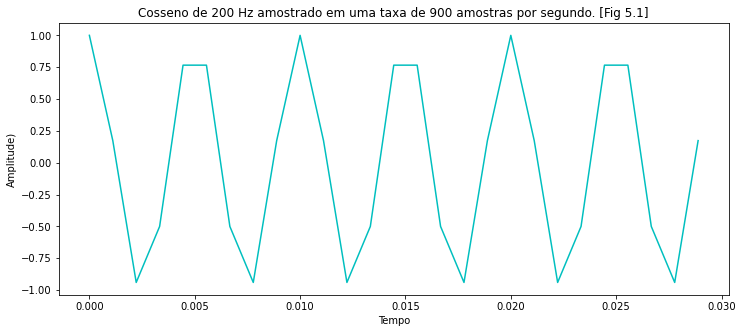

In [9]:
y2 = np.cos(pi*f1*t2)

'plot'
plt.figure(figsize=(12,5))
plt.plot(t2, y2, 'c')
plt.xlabel('Tempo')
plt.ylabel('Amplitude)')
plt.title('Cosseno de {} Hz amostrado em uma taxa de {} amostras por segundo. [Fig 5.1]'.format(f1,fs2));

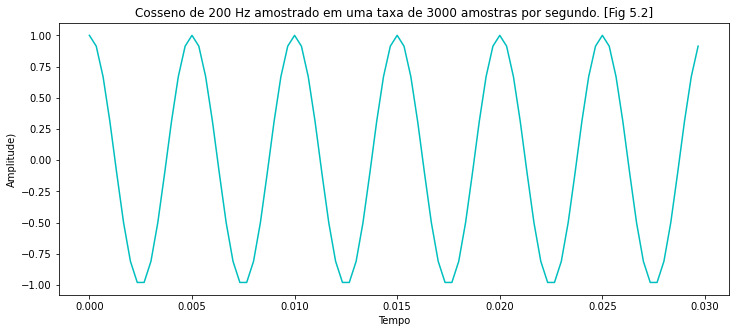

In [10]:
y3 = np.cos(pi*f1*t3)

'plot'
plt.figure(figsize=(12,5))
plt.plot(t3, y3, 'c')
plt.xlabel('Tempo')
plt.ylabel('Amplitude)')
plt.title('Cosseno de {} Hz amostrado em uma taxa de {} amostras por segundo. [Fig 5.2]'.format(f1,fs3));

## Tipos de amostragem
        Explicado o processo de amostragem por impulsos e certamente também deixando claro a necessidade de se prestar a devida atenção quanto ao período de amostragem do sinal, adentramos agora no que seria a delimitação dos tipos de amostragem, serão elas a Amostragem com Impulsos, Amostragem Natural e a Amostragem sample and hold. A amostragem por impulsos foi a fundamentada anteriormente, que é um método ideal e por isso tem sua utilidade apenas teórica, já a Amostragem Natural e Sample and hold tem aplicações práticas e reais, e por isso as mesmas serão estudadas com um pouco mais de cuidado.
        
### Amostragem Natural

        A amostragem natural - modelo prático baseado na teoria da amostragem com impulsos - utiliza um trem de pulsos retangulares, cujas parcelas do sinal analógico são amostradas nesses pulsos em um tempo T de largura em sua duração, assim a largura das amostras vão tomar o formato do sinal analógico. Quanto menor o intervalo da largura, mais chances de o sinal amostrado se aproximar da amostragem com impulsos.
        Esse processo de amostragem é aplicado em modulações de sistemas Pulse Amplitude Modulation (PAM), cuja saída é a convolução do sinal modulante com o sinal do trem de pulsos.
        O sistema PAM recebe como exemplo uma função senoidal denotada como x(t), cujo sinal apresenta uma grandeza infinita em tempo e amplitude, necessitando-o convolucionar. Todo sinal analógico nesse tipo de modulação é preciso deslocar a amplitude positivamente.
        O sinal que será tomado como exemplo para as explicações a seguir será plotado abaixo.

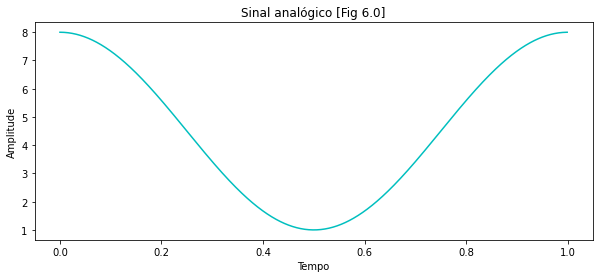

In [11]:
tmin=0; tmax=1;
t = np.linspace(tmin, tmax, 1000, endpoint=False)

dslc = 4.5
xtpam = 3.5*np.cos(pi*t)+dslc                               #Deslocamento do sinal x(t)+4.5

'plot'
plt.figure(figsize=(10,4))
plt.plot(t,xtpam,'c')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Sinal analógico [Fig 6.0]')
plt.show();

        A função abaixo é exemplo do trem de pulsos. Com o período e a largura de pulso constantes, ela é denotada conforme abaixo e é o sinal resultante da expressão listada é responsável por convolucionar o sinal analógico o qual deseja-se amostrar. Um modelo mais próximo do real é calculado quanto se considera o trem de pulsos de amplitude igual ao inverso de sua largura de banda.

> $ x_p(t) = \frac{1}{T} \sum \limits _{n=-∞}^∞ c_ne^{j2{\pi}nf_st} \text{[ 6.0]}$

        As variáveis fs (frequência de amostragem) e cn (coeficientes da série exponencial de Fourier) fazem parte de xp(t), denotadas como:

> $f_s=\frac{1}{T_s}\text{ [6.1]}$;

> $c_n = \frac{1}{T_s}sinc(\frac{nT}{T_s})$ ou  $c_n = f_ssinc(\frac{nT}{T_s})\text{ [6.2]}$.

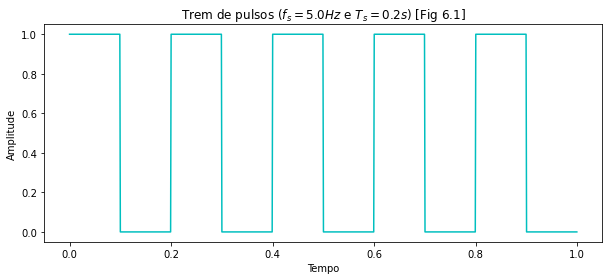

In [12]:
fs = 1/0.2                                                 #Frequência de amostragem 
ts = 1/fs                                                  #Período de amostragem 
                
xpt = (sng.square(2*np.pi*fs*t)+1)/2                       #Trem de pulsos
    
'plot'
plt.figure(figsize=(10,4))
plt.plot(t,xpt,'c')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Trem de pulsos ($f_s = {} Hz$ e $T_s = {} s$) [Fig 6.1]'.format(fs,ts))
plt.show();

        Amostragem adquirida pela convolução das funções, denotada como 

> $ x_s(t) = x(t)*x_p(t)\text{ [7.0]}$

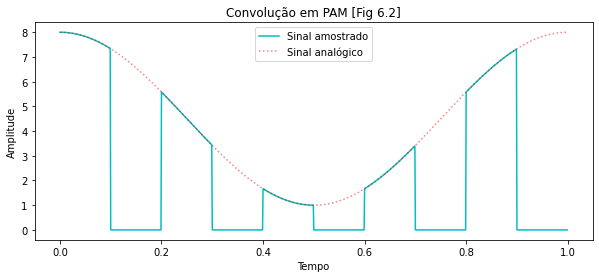

In [13]:
xst = xtpam*xpt

'plot'
plt.figure(figsize=(10,4))
plt.plot(t,xst,'c',label='Sinal amostrado')
plt.plot(t,xtpam,'r:',label='Sinal analógico',alpha=0.5)
plt.legend(loc='best')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Convolução em PAM [Fig 6.2]')
plt.show();

        Em sistemas não PAM, o sinal analógico não precisa ter amplitude deslocada, portanto:

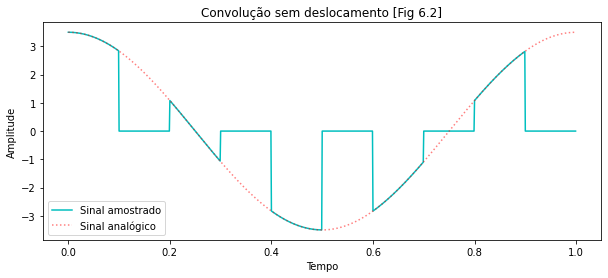

In [14]:
xtnpam = xtpam-dslc                                         #Deslocamento x(t)-4.5
xst2 = xtnpam*xpt

'plot'
plt.figure(figsize=(10,4))
plt.plot(t,xst2,'c',label='Sinal amostrado')
plt.plot(t,xtnpam,'r:',label='Sinal analógico',alpha=0.5)
plt.legend(loc='best')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Convolução sem deslocamento [Fig 6.2]')
plt.show();

### Amostragem Sample and Hold

        Circuitos Sample and Hold, também conhecidos como amostragem e retenção geralmente são utilizados com conversores de sinais analógicos para digital. O intuito deste processo é segurar o sinal de entrada analógico e segurar o sinal amostrado.
        Alguns circuitos Sample-and-Hold recebem pulso externo, mas ele também pode  possuir seu próprio pulso interno também conhecido por alguns como clock. Além disso os circuitos Sample-and-Hold também  pode possuem seu próprio gerador interno de ruído branco que pode ser usado na mixação com outro sinal de entrada produzindo efeitos de som. Uma curiosidade é que muitas empresas de som, fabricantes utilizam desse recurso já implementado como ferramenta.
        Para que o processo ocorra o sinal recebido deve estar estático, enquanto a chave do circuito estiver fechada o sinal de entrada é amostrado e o valor do mesmo é armazenado no capacitor do circuito, caso contrário, enquanto a chave estiver aberta a conversão analógica/digital é efetuada. Toda vez que uma novo sinal estático chega, a chave do conversor analógico/digital alterna entre aberto e fechada, estando assim em sicronia com o mesmo.
        Quando o circuito Sample-and-Hold recebe um pulso, o módulo irá guardar na memória, o nível de voltagem até que o outro pulso chegue para uma nova requisição, caso o sinal de seja constituído constituído por séries de voltagens randômicas que pode ser ligadas ao controle de entrada de um  oscilador, no qual, irá produzir uma série randômica de notas, caso a saída for uma onda em formato de escada a melodia produzida será arpejada.
        As simulações seguir mostram a entrada e a saída de como um sinal se comporta diante de um sistema S/H:

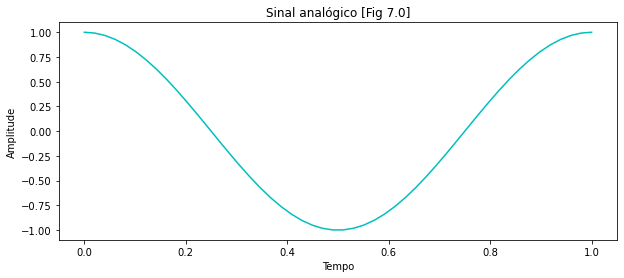

In [15]:
tmin = 0
tmax = 1
t = np.linspace(tmin, tmax, 50)

y = np.cos(t*pi)   

'plot'
plt.figure(figsize=(10,4))
plt.ylabel('Amplitude')
plt.xlabel('Tempo')
plt.plot(t, y,color = 'c',label = 'Sinal analógico')
plt.title('Sinal analógico [Fig 7.0]');

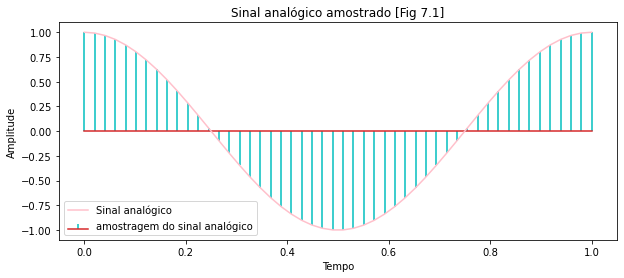

In [16]:
'plot'
plt.figure(figsize=(10,4))
plt.stem(t, y, 'c-', markerfmt=' ', label = "amostragem do sinal analógico", use_line_collection = True)
plt.plot(t, y, color = 'pink',label = 'Sinal analógico')
plt.ylabel('Amplitude')
plt.xlabel('Tempo')
plt.legend()
plt.title('Sinal analógico amostrado [Fig 7.1]');

        E como bem sabemos, a amostragem é representada pela convolução do trem de pulsos, x(t)xδ(t) por um pulso retangular p(t) de amplitude unitária e largura Ts , assim temos que:
        
> $ x_s(t) = p(t) * x(t)δ(t) \text{ [7.0]}$

> $ p(t) * [x(t)\sum \limits _{n=-∞}^∞ δ(t - nTs)]\text{ [7.1]}$

        Para melhor compreensão das fórmulas aqui descritas será feito, bem como foi feito anteriormente, a exemplificação de cada uma delas como uma espécie de simulação.

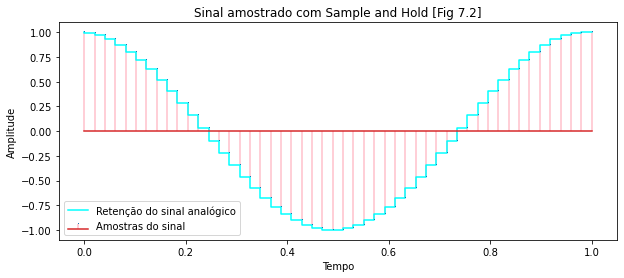

In [17]:
'plot'
plt.figure(figsize=(10,4))
plt.step(t, y,label='Retenção do sinal analógico',color = 'cyan')
plt.stem(t,y,'pink', label='Amostras do sinal',markerfmt=',', use_line_collection = True)
plt.ylabel('Amplitude')
plt.xlabel('Tempo')
plt.legend();
plt.title('Sinal amostrado com Sample and Hold [Fig 7.2]');

## Considerações finais

        Após ter todo esse caminho percorrido diante do assunto de amostragem de sinais analógicos, por sua vez de tempo e amplitude contínuos, foi possível compreender a importância do processo de amostragem nas comunicações digitais e certamente também a necessidade de se ater a todos os parâmetros matemáticos que a fundamentam, seja a teoria por trás do impulso unitário (trem de impulsos no geral) ou até mesmo o que nomeamos aqui como teorema de amostragem, esse fundamentado por Harry Nyquist.
        Também foi possível verificar os tipos de amostragem e a forma com que o sinal (cossenoidal por padrão) analógico teve uma saída PAM variada em virtude disso. 
        Existe, no entanto, uma série de outros pontos que sucedem o processo de amostragem para que de fato um sinal analógico seja transformado em um sinal digital. O bloco conversor analógico/digital, também conhecido como conversor A/D, é composto por vários blocos menores que constituem o que chamamos de PCM, que é um processo de modulação que não está no escopo desse documento.
        Lista-se aqui como pesquisas futuras uma análise quanto ao processo de quantização, bloco posterior ao de amostragem no conversor A/D, que é responsável por transformar o sinal de tempo discreto e amplitude contínua, portanto ainda não digital, presente na saída do amostrador e transformá-lo em um sinal com o tempo e sua amplitude discretizadas.

## Referências

HAYKIN, S; MOHER, M. Introdução aos Sistemas de comunicação, 2a Ed., Bookman, Porto Alegre, 2008.

LATHI, B. P.; ZHI DING. Modern Digital and Analog Communication Systems, 4a Ed., OXFORD UNIVERSITY PRESS, New York, 2010.

Audio Processing in Python Part I: Sampling, Nyquist, and the Fast Fourier Transform. Disponível em: https://makersportal.com/blog/2018/9/13/audio-processing-in-python-part-i-sampling-and-the-fast-fourier-transform. Acesso em: 03/05/2021.

Teoria e Prática de Processamento de Sinais e Imagens. Disponível em: https://fei.edu.br/~isanches/verao/curso_de_verao_2017.html. Acesso em: 04/05/2021.

Getting into Digital Signal Processing Part 2: Sampling & Aliasing. Disponível em: https://www.rs-online.com/designspark/getting-into-digital-signal-processing-sampling-aliasing. Acesso em: 05/05/2021.

Sample and Hold Circuit. Disponível em: https://www.electronicshub.org/sample-and-hold-circuit/. Acesso em: 06/05/2021.